# Run experiments on GSFuzzyCMeans

## 1. Experiments!

In [ ]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix
from tqdm import tqdm
from itertools import product
import time
from concurrent.futures import ProcessPoolExecutor, as_completed
from preprocessing import DataLoader, DataProcessor
from fuzzy import GSFuzzyCMeans

# Define evaluation metrics
metrics = {
    "Adjusted Rand Index": adjusted_rand_score,
    "Davies-Bouldin Index": davies_bouldin_score,
    "Silhouette Score": silhouette_score
}

def purity_score(y_true, y_pred):
    # Compute the contingency matrix
    matrix = contingency_matrix(y_true, y_pred)
    # Calculate purity
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

fuzzy_exponents = [1.5, 2.5, 3.5]
xi_values       = [0.3, 0.5, 0.7]
k_values        = range(2, 16)

# Prepare parameter combinations
parameter_combinations = list(product(k_values, fuzzy_exponents, xi_values))
print(f"Total parameter combinations: {len(parameter_combinations)}")

# Create results directory
os.makedirs("results", exist_ok=True)

def run_experiment(args):
    dataset_name, parameters = args
    k, m, xi = parameters
    num_runs = 3  # Number of runs per configuration

    try:
        # Initialize loaders and preprocessors
        data_loader = DataLoader()
        data_processor = DataProcessor()

        # Load dataset
        data, labels = data_loader.load_arff_data(dataset_name)
        X = data_processor.preprocess_dataset(data)
        y_true = labels

        # Accumulate scores over multiple runs
        scores = {
            "k": k, "m": m, "xi": xi,
            "Adjusted Rand Index"   : 0.0,
            "Davies-Bouldin Index"  : 0.0,
            "Silhouette Score"      : 0.0,
            "Purity Score"          : 0.0,
            "Time (s)"              : 0.0,
            "Iterations"            : 0
        }

        for _ in range(num_runs):
            start_time = time.time()
            gs_fcm = GSFuzzyCMeans(n_clusters=k, m=m, xi=xi, max_iter=100, random_state=None)
            gs_fcm.fit(X)
            y_pred = gs_fcm.predict(X)
            elapsed_time = time.time() - start_time

            # Update scores
            scores["Adjusted Rand Index"]   += adjusted_rand_score(y_true, y_pred)
            scores["Davies-Bouldin Index"]  += davies_bouldin_score(X, y_pred)
            scores["Silhouette Score"]      += silhouette_score(X, y_pred)
            scores["Purity Score"]          += purity_score(y_true, y_pred)
            scores["Time (s)"]              += elapsed_time
            scores["Iterations"]            += gs_fcm.n_iter_

        # Average scores
        for key in ["Adjusted Rand Index", "Davies-Bouldin Index", "Silhouette Score", "Purity Score", "Time (s)", "Iterations"]:
            scores[key] /= num_runs

        return scores

    except Exception as e:
        # Return the exception with parameters for easier debugging
        return {"k": k, "m": m, "xi": xi, "Error": str(e)}

datasets = ["vowel", "splice", "satimage"]

for dataset_name in datasets:
    print(f"\nRunning experiments for {dataset_name} dataset...")
    results_file = f"results/FUZZY_{dataset_name}_results_AVG.csv"

    # Check if the results file exists to determine if we need to write headers
    file_exists = os.path.isfile(results_file)

    # Prepare experiments
    experiments = [(dataset_name, params) for params in parameter_combinations]

    # Run experiments in parallel
    with ProcessPoolExecutor() as executor:
        futures = {executor.submit(run_experiment, args): args for args in experiments}

        # Open the CSV file in append mode
        with open(results_file, 'a', newline='') as csvfile:
            fieldnames = ["k", "m", "xi", "Adjusted Rand Index", "Davies-Bouldin Index",
                          "Silhouette Score", "Purity Score", "Time (s)", "Iterations"]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write header only if the file doesn't exist or is empty
            if not file_exists or os.stat(results_file).st_size == 0:
                writer.writeheader()

            for future in tqdm(as_completed(futures), total=len(experiments), desc=f"Processing {dataset_name}"):
                try:
                    result = future.result()
                    # Write the result to CSV immediately
                    writer.writerow(result)
                except Exception as e:
                    print(f"Experiment failed: {e}")


Total parameter combinations: 126

Running experiments for vowel dataset...


Processing vowel: 100%|██████████| 126/126 [02:07<00:00,  1.01s/it]


Running experiments for splice dataset...



Processing splice: 100%|██████████| 126/126 [09:57<00:00,  4.74s/it]


Running experiments for satimage dataset...



Processing satimage: 100%|██████████| 126/126 [14:38<00:00,  6.98s/it]


In [ ]:

# Define evaluation metrics
metrics = {
    "Adjusted Rand Index": adjusted_rand_score,
    "Davies-Bouldin Index": davies_bouldin_score,
    "Silhouette Score": silhouette_score
}

def purity_score(y_true, y_pred):
    # Compute the contingency matrix
    matrix = contingency_matrix(y_true, y_pred)
    # Calculate purity
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

fuzzy_exponents = [1.5, 2.5, 3.5]
xi_values       = [0.3, 0.5, 0.7]
k_values        = range(2, 16)

# Prepare parameter combinations
parameter_combinations = list(product(k_values, fuzzy_exponents, xi_values))
print(f"Total parameter combinations: {len(parameter_combinations)}")

# Create results directory
os.makedirs("results", exist_ok=True)

def run_experiment(args):
    dataset_name, parameters = args
    k, m, xi = parameters
    num_runs = 3  # Number of runs per configuration

    try:
        # Initialize loaders and preprocessors
        data_loader = DataLoader()
        data_processor = DataProcessor()

        # Load dataset
        data, labels = data_loader.load_arff_data(dataset_name)
        X = data_processor.preprocess_dataset(data)
        y_true = labels

        # Accumulate scores over multiple runs
        scores = {
            "k": k, "m": m, "xi": xi,
            "Adjusted Rand Index"   : 0.0,
            "Davies-Bouldin Index"  : 0.0,
            "Silhouette Score"      : 0.0,
            "Purity Score"          : 0.0,
            "Time (s)"              : 0.0,
            "Iterations"            : 0
        }

        for _ in range(num_runs):
            start_time = time.time()
            gs_fcm = GSFuzzyCMeans(n_clusters=k, m=m, xi=xi, max_iter=100, random_state=None)
            gs_fcm.fit(X)
            y_pred = gs_fcm.predict(X)
            elapsed_time = time.time() - start_time

            # Update scores
            scores["Adjusted Rand Index"]   += adjusted_rand_score(y_true, y_pred)
            scores["Davies-Bouldin Index"]  += davies_bouldin_score(X, y_pred)
            scores["Silhouette Score"]      += silhouette_score(X, y_pred)
            scores["Purity Score"]          += purity_score(y_true, y_pred)
            scores["Time (s)"]              += elapsed_time
            scores["Iterations"]            += gs_fcm.n_iter_

        # Average scores
        for key in ["Adjusted Rand Index", "Davies-Bouldin Index", "Silhouette Score", "Purity Score", "Time (s)", "Iterations"]:
            scores[key] /= num_runs

        return scores

    except Exception as e:
        # Return the exception with parameters for easier debugging
        return {"k": k, "m": m, "xi": xi, "Error": str(e)}

datasets = ["vowel", "splice", "satimage"]

for dataset_name in datasets:
    print(f"\nRunning experiments for {dataset_name} dataset...")
    results_file = f"results/FUZZY_{dataset_name}_results_AVG.csv"

    # Check if the results file exists to determine if we need to write headers
    file_exists = os.path.isfile(results_file)

    # Prepare experiments
    experiments = [(dataset_name, params) for params in parameter_combinations]

    # Run experiments in parallel
    with ProcessPoolExecutor() as executor:
        futures = {executor.submit(run_experiment, args): args for args in experiments}

        # Open the CSV file in append mode
        with open(results_file, 'a', newline='') as csvfile:
            fieldnames = ["k", "m", "xi", "Adjusted Rand Index", "Davies-Bouldin Index",
                          "Silhouette Score", "Purity Score", "Time (s)", "Iterations"]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

            # Write header only if the file doesn't exist or is empty
            if not file_exists or os.stat(results_file).st_size == 0:
                writer.writeheader()

            for future in tqdm(as_completed(futures), total=len(experiments), desc=f"Processing {dataset_name}"):
                try:
                    result = future.result()
                    # Write the result to CSV immediately
                    writer.writerow(result)
                except Exception as e:
                    print(f"Experiment failed: {e}")


## 2. We go on to plotting

### 2.1 Obtain composite metric

In [ ]:
# Cell 1: Data Processing and Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Function to normalize columns in the DataFrame
def normalize_columns(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# List of datasets and their corresponding file names
datasets = ['satimage', 'splice', 'vowel']
file_names = [
    'FUZZY_satimage_results_AVG.csv',
    'FUZZY_splice_results_AVG.csv',
    'FUZZY_vowel_results_AVG.csv'
]

# Dictionary to store the processed DataFrames
data_dict = {}

# Loop through each dataset
for dataset, file_name in zip(datasets, file_names):
    # Read the CSV file
    df = pd.read_csv("results/" + file_name)
    
    # Ensure column names are correct (remove any trailing spaces)
    df.rename(columns=lambda x: x.strip(), inplace=True)
    
    # Select the columns to normalize
    normalize_cols = ['Adjusted Rand Index', 'Davies-Bouldin Index', 'Silhouette Score', 'Purity Score', 'Iterations']
    
    # Normalize the specified columns to [0, 1]
    df = normalize_columns(df, normalize_cols)
    
    # Since we want to minimize 'Iterations' and 'Davies-Bouldin Index', compute (1 - normalized value)
    df['Iterations_Norm'] = 1 - df['Iterations']
    df['DBI_Norm'] = 1 - df['Davies-Bouldin Index']
    
    # Compute the composite metric
    df['Composite Metric'] = (
        0.2 * df['Silhouette Score'] +
        0.2 * df['Adjusted Rand Index'] +
        0.2 * df['Purity Score'] +
        0.2 * df['Iterations_Norm'] +
        0.2 * df['DBI_Norm']
    )
    
    # Store the processed DataFrame in the dictionary
    data_dict[dataset] = df


### 2.2 Obtain "best configurations"

In [7]:
# Assuming data_dict contains the processed DataFrames with 'Metric' column
best_configs = {}

for dataset in datasets:
    df = data_dict[dataset]
    # Find the row with the maximum composite metric
    best_row = df.loc[df['Composite Metric'].idxmax()]
    # Extract the best parameters
    best_k = best_row['k']
    best_m = best_row['m']
    best_xi = best_row['xi']
    best_configs[dataset] = {'k': best_k, 'm': best_m, 'xi': best_xi}
    print(f"Best configuration for {dataset}: k={best_k}, m={best_m}, xi={best_xi}")


Best configuration for satimage: k=4.0, m=2.5, xi=0.3
Best configuration for splice: k=4.0, m=3.5, xi=0.3
Best configuration for vowel: k=15.0, m=1.5, xi=0.5


### 2.3 Graphs

#### 2.3.1 Parameters vs metric, per dataset

/tmp/ipykernel_24805/2749445997.py:82: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


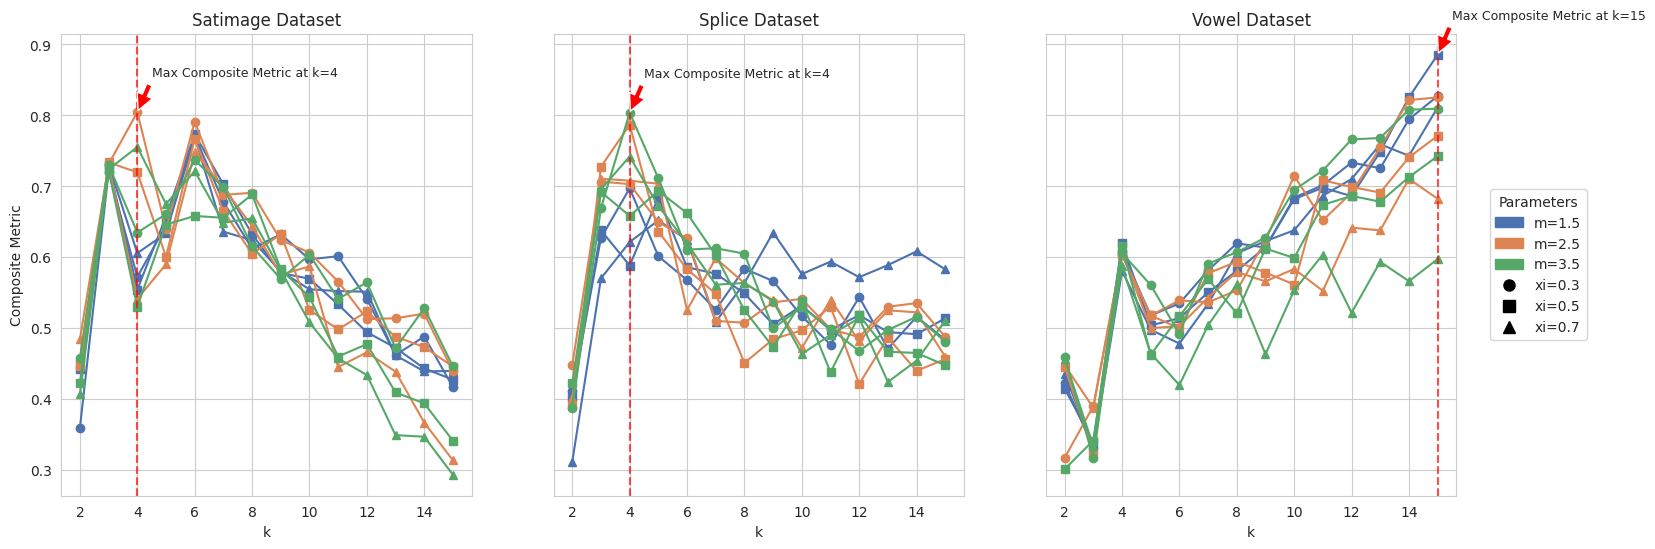

In [11]:
# Cell 2: Plotting the Line Plots

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')

# Define unique markers and colors
marker_styles = ['o', 's', '^', 'D', 'v', 'x', '*', 'P', 'h', '+']  # For xi values
# Use a Seaborn color palette for m values
color_palette = sns.color_palette("deep", n_colors=10)  # Adjust n_colors if necessary

# Prepare the figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, dataset in enumerate(datasets):
    # Retrieve the processed DataFrame
    df = data_dict[dataset]
    
    # Sort the DataFrame based on 'k' for plotting
    df.sort_values('k', inplace=True)
    
    # Get the subplot axis
    ax = axes[idx]
    
    # Get unique values of m and xi
    unique_m = sorted(df['m'].unique())
    unique_xi = sorted(df['xi'].unique())
    
    # Create mappings for m to colors and xi to markers
    m_to_color = {m_value: color_palette[i % len(color_palette)] for i, m_value in enumerate(unique_m)}
    xi_to_marker = {xi_value: marker_styles[i % len(marker_styles)] for i, xi_value in enumerate(unique_xi)}
    
    # Plot for each combination of m and xi
    for m_value in unique_m:
        for xi_value in unique_xi:
            subset = df[(df['m'] == m_value) & (df['xi'] == xi_value)]
            if not subset.empty:
                ax.plot(subset['k'], subset['Composite Metric'],
                        color=m_to_color[m_value],
                        marker=xi_to_marker[xi_value],
                        linestyle='-',
                        markersize=6)
    
    # Find the k where the metric is maximized
    max_metric_idx = df['Composite Metric'].idxmax()
    max_k = df.loc[max_metric_idx, 'k']
    max_metric = df.loc[max_metric_idx, 'Composite Metric']
    
    # Mark the maximum metric point
    ax.axvline(x=max_k, color='red', linestyle='--', alpha=0.7)
    ax.annotate(f'Max Composite Metric at k={max_k}', xy=(max_k, max_metric), xytext=(max_k + 0.5, max_metric + 0.05),
                arrowprops=dict(facecolor='red', shrink=0.05), ha='left', fontsize=9)
    
    # Set titles and labels
    ax.set_title(f'{dataset.capitalize()} Dataset')
    ax.set_xlabel('k')
    if idx == 0:
        ax.set_ylabel('Composite Metric')
    ax.grid(True)
    
# Create custom legends for m (colors) and xi (markers)
# Legend for m (colors)
color_handles = [mpatches.Patch(color=m_to_color[m_value], label=f'm={m_value}') for m_value in unique_m]

# Legend for xi (markers)
marker_handles = [mlines.Line2D([], [], color='black', marker=xi_to_marker[xi_value], linestyle='None',
                                markersize=8, label=f'xi={xi_value}') for xi_value in unique_xi]

# Combine the handles
legend_handles = color_handles + marker_handles

# Place the legend to the left of the plots
axes[0].legend(handles=legend_handles, fontsize='medium', title='Parameters',
               bbox_to_anchor=(3.6, 0.5), loc='center', borderaxespad=0.)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### 3.3.2 How do clusters look for best config per dataset?

In [ ]:
import numpy as np
from preprocessing import DataLoader, DataProcessor
from fuzzy import GSFuzzyCMeans

# Dictionary to store datasets and labels
dataset_labels = {}

for dataset in datasets:
    # Initialize loaders and preprocessors
    data_loader = DataLoader()
    data_processor = DataProcessor()
    
    # Load dataset using your custom loader
    data, labels = data_loader.load_arff_data(dataset)  # Assuming datasets are in ARFF format
    X = data_processor.preprocess_dataset(data)
    y_true = labels  # Ground truth labels (if needed)
    
    # Get best parameters
    best_k = int(best_configs[dataset]['k'])
    best_m = best_configs[dataset]['m']
    best_xi = best_configs[dataset]['xi']
    
    # Apply clustering with best parameters
    gs_fcm = GSFuzzyCMeans(n_clusters=best_k, m=best_m, xi=best_xi, max_iter=100)
    gs_fcm.fit(X)
    y_pred = gs_fcm.predict(X)
    
    # Store the data and labels
    dataset_labels[dataset] = {'data': X, 'labels': y_pred}


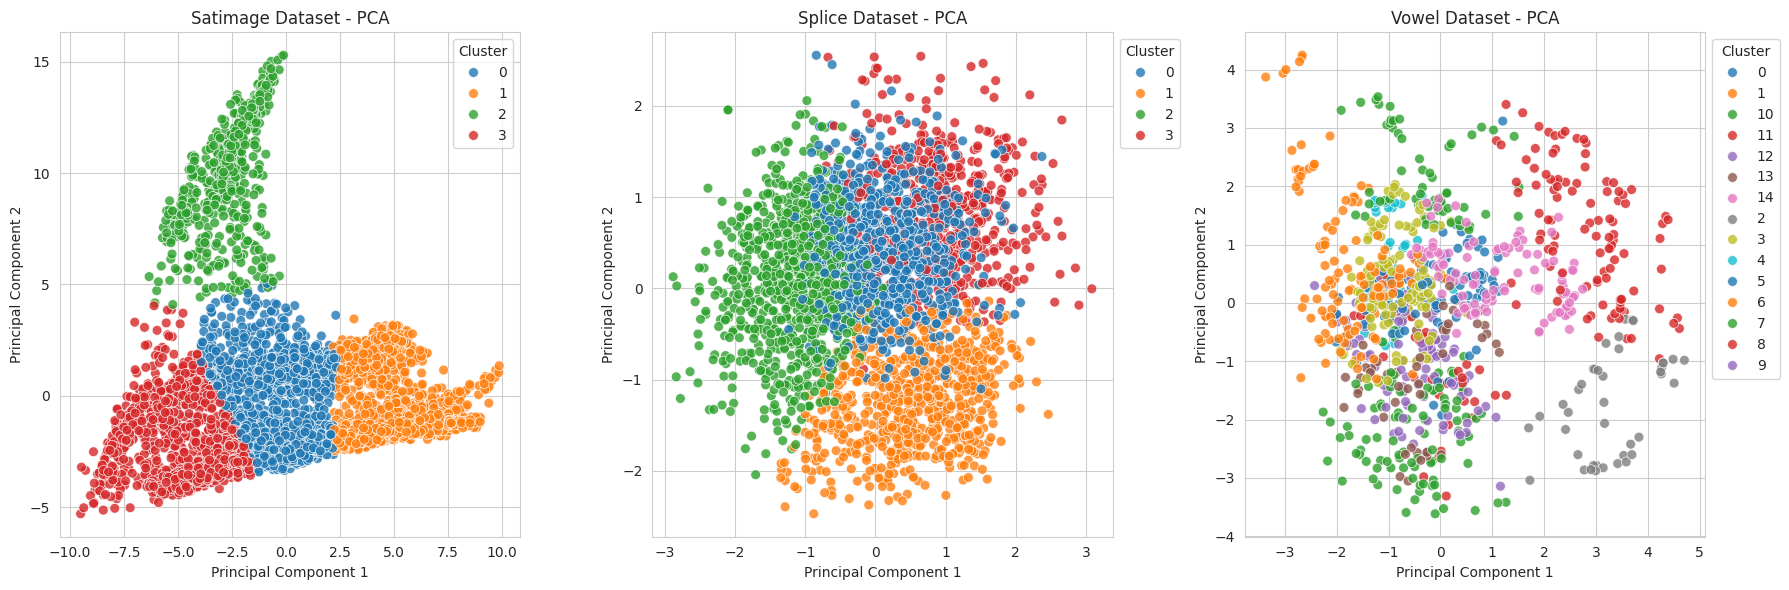

In [24]:
# Cell 5: Dimensionality Reduction and Plotting Using PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Ensure this is imported if not already
from sklearn.decomposition import PCA

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')

# Prepare the figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for idx, dataset in enumerate(datasets):
    # Retrieve data and labels
    data = dataset_labels[dataset]['data']
    labels = dataset_labels[dataset]['labels']
    
    # Apply PCA
    pca = PCA(n_components=2)
    data_reduced = pca.fit_transform(data)
    
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(data_reduced, columns=['Principal Component 1', 'Principal Component 2'])
    plot_df['Cluster'] = labels.astype(str)
    
    # Ensure the legend is ordered numerically
    plot_df['Cluster'] = pd.Categorical(plot_df['Cluster'], categories=sorted(plot_df['Cluster'].unique()), ordered=True)
    
    # Plot
    ax = axes[idx]
    sns.scatterplot(data=plot_df, x='Principal Component 1', y='Principal Component 2',
                    hue='Cluster', palette='tab10', ax=ax, s=50, alpha=0.8, legend='full')
    ax.set_title(f'{dataset.capitalize()} Dataset - PCA')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend(title='Cluster', loc='best', bbox_to_anchor=(1, 1))
    
plt.tight_layout()
plt.show()


#### 3.3.3 Confusion matrices

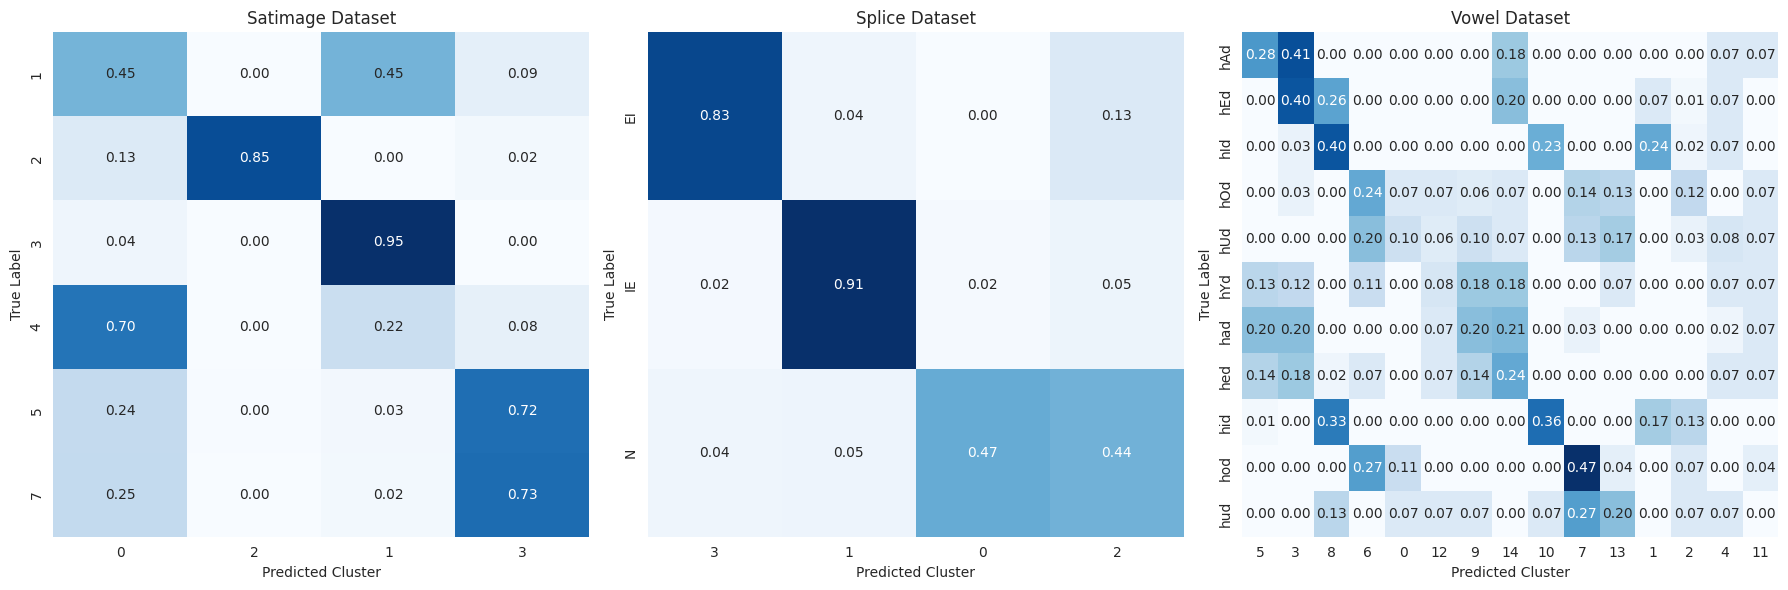

In [32]:
# Cell 6: Plotting Diagonalized Confusion Matrices

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

# Set seaborn style for better aesthetics
sns.set_style('whitegrid')

# Ensure datasets is defined
# datasets = ['satimage', 'splice', 'vowel']

# Adjust the number of subplots based on the number of datasets
num_datasets = len(datasets)
fig, axes = plt.subplots(1, num_datasets, figsize=(6 * num_datasets, 6))

# If there's only one dataset, axes may not be an array; make it into a list
if num_datasets == 1:
    axes = [axes]

for idx, dataset in enumerate(datasets):
    # Retrieve true labels and predicted labels
    data_loader = DataLoader()
    _, y_true = data_loader.load_arff_data(dataset)
    y_pred = dataset_labels[dataset]['labels']
    
    # Map true labels and predicted labels to consecutive integers
    y_true_unique = np.unique(y_true)
    y_pred_unique = np.unique(y_pred)
    
    y_true_mapping = {label: idx for idx, label in enumerate(y_true_unique)}
    y_pred_mapping = {label: idx for idx, label in enumerate(y_pred_unique)}
    
    y_true_mapped = np.array([y_true_mapping[label] for label in y_true])
    y_pred_mapped = np.array([y_pred_mapping[label] for label in y_pred])
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true_mapped, y_pred_mapped)
    
    # Apply the Hungarian algorithm to find the best assignment
    cost_matrix = cm.max() - cm  # Convert to cost matrix for maximization
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    # Reorder the confusion matrix
    cm_reordered = cm[:, col_ind]
    
    # Remove rows and columns that sum to 0
    non_zero_rows = np.any(cm_reordered > 0, axis=1)
    non_zero_cols = np.any(cm_reordered > 0, axis=0)
    cm_reordered = cm_reordered[non_zero_rows, :][:, non_zero_cols]
    
    # Normalize confusion matrix to [0,1]
    cm_row_sums = cm_reordered.sum(axis=1, keepdims=True)
    cm_row_sums[cm_row_sums == 0] = 1  # Avoid division by zero
    cm_normalized = cm_reordered.astype('float') / cm_row_sums
    
    # Generate labels for heatmap axes
    true_labels_names = [str(y_true_unique[i]) for i in range(len(y_true_unique)) if non_zero_rows[i]]
    pred_labels_names = [str(y_pred_unique[col_ind[j]]) for j in range(len(col_ind)) if non_zero_cols[j]]
    
    # Access the correct axis
    ax = axes[idx]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax,
                xticklabels=pred_labels_names, yticklabels=true_labels_names, cbar=False)
    ax.set_title(f'{dataset.capitalize()} Dataset')
    ax.set_xlabel('Predicted Cluster')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import os

# Define the directory containing the CSV files
results_dir = "results/"  # Change this to the absolute path if necessary

# Define a list of tuples containing file names and their corresponding dataset names
files = [
    ("FUZZY_satimage_results_MAX.csv", "satimage"),
    ("FUZZY_splice_results_MAX.csv", "splice"),
    ("FUZZY_vowel_results_MAX.csv", "vowel")
]

# Initialize an empty list to hold individual DataFrames
dataframes = []

for file_name, dataset_name in files:
    file_path = os.path.join(results_dir, file_name)
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Add a new column 'dataset' with the corresponding dataset name
        df['dataset'] = dataset_name
        
        # Append the DataFrame to the list
        dataframes.append(df)
        
        print(f"Successfully processed {file_name}")
    except FileNotFoundError:
        print(f"Error: {file_name} not found in {results_dir}. Please check the file path.")
    except pd.errors.EmptyDataError:
        print(f"Error: {file_name} is empty.")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

if dataframes:
    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Specify the output file name
    output_file = os.path.join(results_dir, "fuzzy_results.csv")
    
    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv(output_file, index=False)
    
    print(f"Combined CSV saved as {output_file}")
else:
    print("No data to combine.")


Successfully processed FUZZY_satimage_results_MAX.csv
Successfully processed FUZZY_splice_results_MAX.csv
Successfully processed FUZZY_vowel_results_MAX.csv
Combined CSV saved as results/fuzzy_results.csv
